## Importing library and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

C:\Users\thain\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
##Importing the scaled version of from load_svmlight_file
from sklearn.datasets import load_svmlight_file
def get_data(data):
    data = load_svmlight_file(data)
    return data[0], data[1]

features, target = get_data("diabetes_scale.txt")

In [3]:
# checking the target array
print(f'unique values in the target are {np.unique(target)}, with {len(target)} observations')

unique values in the target are [-1.  1.], with 768 observations


In [4]:
## Converting feature to array
features=features.toarray()


In [5]:
## checking the dataset with describe() and head()
pd.DataFrame(features).describe()

,0,1,2,3,4,5,6,7
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-0.547641,0.215020,0.132877,-0.585122,-0.811349,-0.046421,-0.663641,-0.591971
std,0.396421,0.321333,0.317308,0.322267,0.272444,0.234997,0.282945,0.392008
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858455,-0.900000
50%,-0.647059,0.175879,0.180328,-0.535354,-0.927896,-0.046200,-0.748506,-0.733333
75%,-0.294118,0.409547,0.311475,-0.353535,-0.699173,0.090909,-0.531811,-0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
(pd.DataFrame(features).head())

,0,1,2,3,4,5,6,7
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


## Splitting datasets into train,validation and test set

In [7]:
from sklearn.model_selection import train_test_split

X_bigtrain, X_test, y_bigtrain, y_test = train_test_split(features,target , test_size=0.2, random_state=42,stratify=target)
X_train, X_val, y_train, y_val = train_test_split(X_bigtrain,y_bigtrain , test_size=0.2, random_state=42,stratify=y_bigtrain)

print(X_train.shape,y_train.shape, X_val.shape,y_val.shape,X_test.shape,y_test.shape)

(491, 8) (491,) (123, 8) (123,) (154, 8) (154,)


In [8]:
##Code for loading downloaded data
#with open('diabetes_scale.txt') as f:
#    for line in f:
#        data = line.split()
#        target = float(data[0]) # target value
#        row = []
#
#        for i, (idx, value) in enumerate([item.split(':') for item in data[1:]]):
#            n = int(idx) - (i + 1) # num missing
#            for _ in range(n):
#                print('miss')
#                row.append(0) # for missing
#            row.append(float(value))
#        Matrix.append(row)

In [9]:

#min_vals=np.min(unscale_features,axis=0)
#max_vals=np.max(unscale_features,axis=0)
#scale_factor=(max_vals-min_vals)/2
#scaled_X=[]
#for i in range(len(unscale_features)):
#    new_X=(unscale_features[i]-scale_factor)/(max_vals-scale_factor)
#    scaled_X.append(new_X)
#pd.DataFrame(scaled_X)

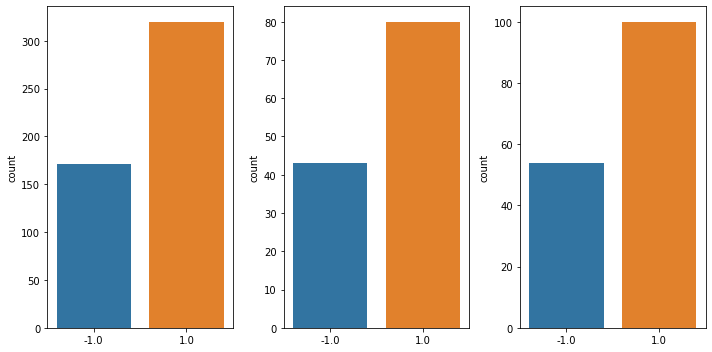

In [10]:
## Verify that the data is split with correct stratification
import seaborn as sns
ncol = 3
nrow = 1
y_list=[y_train,y_val,y_test]
plt.figure(figsize=(10,5))
for i in range(1,4):
    plt.subplot(nrow,ncol,i)
    sns.countplot(x=y_list[i-1])
plt.tight_layout()

In [11]:
## checking the data
features

array([[-0.294118  ,  0.487437  ,  0.180328  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [-0.411765  ,  0.21608   ,  0.180328  , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-0.882353  ,  0.266332  , -0.0163934 , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [-0.882353  , -0.0653266 ,  0.147541  , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

## Exploratory data analysis

In [12]:
## Making boxplot for exploratory analysis (as an attempt to see why the model may not make good prediction)
diabetes=pd.DataFrame(features)
diabetes['label']=target
diabetes

,0,1,2,3,4,5,6,7,label
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,-1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,-1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,-1.0
...,...,...,...,...,...,...,...,...,...
763,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1.0
764,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000,1.0
765,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1.0
766,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333,-1.0


In [13]:
## EDA continued
colnames=['pregnancies','glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','label']
diabetes.columns=colnames

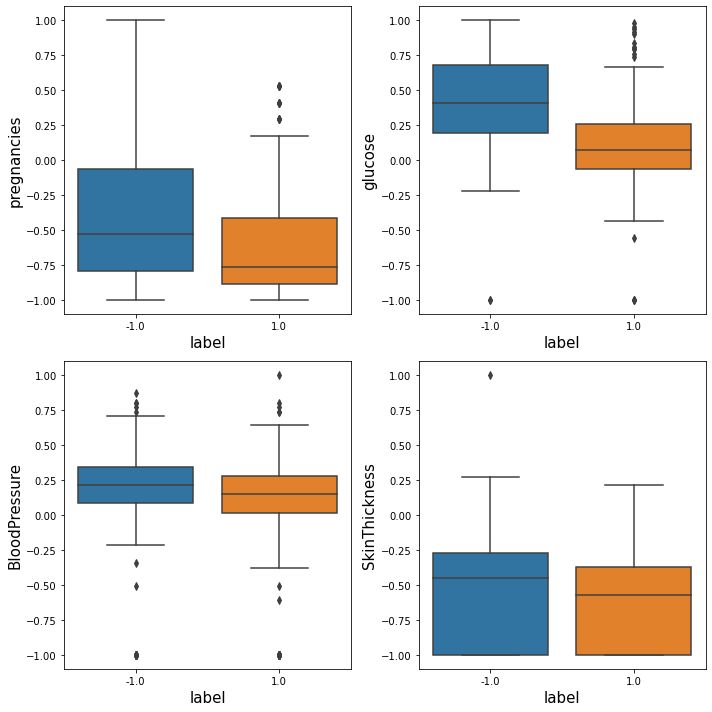

In [14]:
## Boxplots

ncol = 2
nrow = 2

plt.figure(figsize=(10,10))
for i in range(1,5):
    plt.subplot(nrow,ncol,i)
    a=sns.boxplot(y=diabetes.columns[i-1],x='label',data=diabetes)
    a.set_xlabel(xlabel='label',fontsize=15)
    a.set_ylabel(ylabel=colnames[i-1],fontsize=15)
plt.tight_layout()

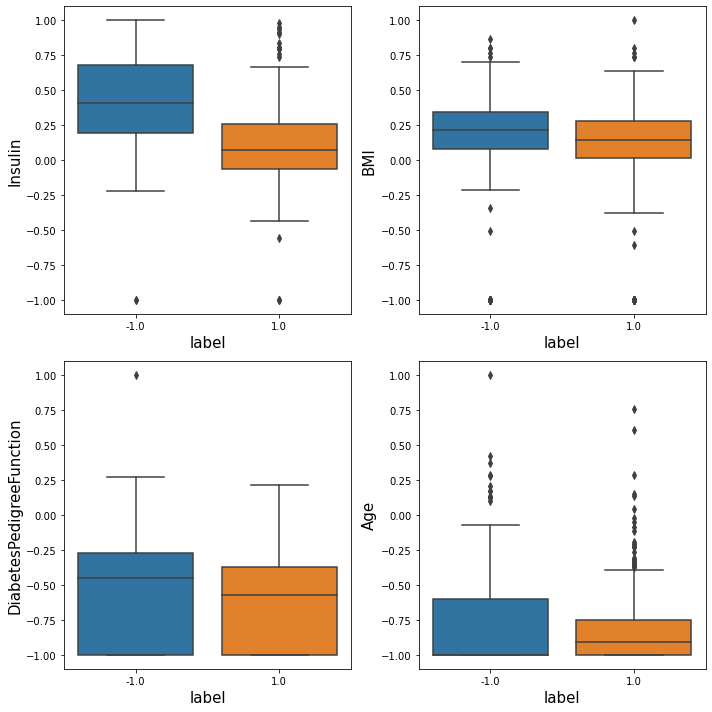

In [15]:
ncol = 2
nrow = 2

plt.figure(figsize=(10,10))
for i in range(5,9):
    plt.subplot(nrow,ncol,i-4)
    a=sns.boxplot(y=diabetes.columns[i-4],x='label',data=diabetes)
    a.set_xlabel(xlabel='label',fontsize=15)
    a.set_ylabel(ylabel=colnames[i-1],fontsize=15)
plt.tight_layout()

## Function for Perceptron

In [16]:
### function for implementation of Perceptron


#activation function (or function to make prediction after the inputs is iterated throught the weight)
def predict(X,w):
    #computing dot product between input vector and weight vector + bias
    if X.shape[0]<len(w):
        value=np.matmul(X,w[:-1])[0]+w[-1]
        
        
    #computing dot product between input vector and weight vector when bias is not created, or bias=0
    else:
        
        value=np.matmul(X,w)[0]
        
    ## prediction criteria (1 if the calculation is >0 and -1 otherwise)
    if value>0:
        return 1
    return -1



## Function for a forward pass of an entire dataset (or 1 epoch) and updating weight (the function return updated weight)
def forward(X,y,W,bias=None,learn_rate=0.01,batch_size=1):
    
    # values to keep track of when an update should be made
    n_obs=0
    updates=np.zeros(W.shape) #an array to store update value
    
    # iteration through the whole dataset
    for i in range(len(X)):
        ## an update is made once the number of observation passes through the weight matches batch_size
        n_obs+=1
        
        #updates to be included once an wrong prediction is made
        if predict(X[i],W)!=y[i]:
            
            updates+=(learn_rate*(X[i]*y[i]).reshape(X.shape[1],1))
            
        # updating the weights and reset the update array to an 0 array 
        if n_obs==batch_size:
            n_obs=0
            W+=updates
            updates=np.zeros(W.shape)
    
    # update from the last batch of data (if the last batch has fewer observation than batch_size)
    W+=updates

    return W



## Function to train an entire Perceptron and return: learning curve, the weight (or the model)
# training and validation accuracy of the returned weight

def train_perceptron(X_train,y_train,X_val,y_val,W,epochs,bias=None,learn_rate=0.01,shuffle=False,early_stopping=0,seed=1,
                    batch_size=1, plot=True):
    

    ## Updating input accordingly to whether the model should have a bias or not
    if bias is not None:
        new_X_train=np.append(X_train.copy(),np.ones((X_train.shape[0],1),dtype=X_train.dtype),axis=1)
        W=np.append(W,bias)
        W=W.reshape((W.shape[0],1))
    else:
        new_X_train=np.append(X_train.copy(),np.zeros((X_train.shape[0],1),dtype=X_train.dtype),axis=1)
        W=np.append(W,0)
        W=W.reshape((W.shape[0],1))

    
    # list and value to store and calculate training and validation accuracy
    train_acc_list=[]
    val_acc_list=[]
    val_obs=len(y_val)
    train_obs=len(y_train)
    
    
    # list to store prediction of each individual observations in both training and validation datasets
    val_results=[]
    train_results=[]
    

    
   ## Prediction with initial weights and storing the initial results
    for i in range(len(y_train)):
        train_results.append(predict(new_X_train[i],W)==y_train[i])
    for i in range(len(y_val)):
        val_results.append(predict(X_val[i],W)==y_val[i])
    train_acc_list.append(sum(train_results)/train_obs)
    cur_val_acc=sum(val_results)/val_obs
    val_acc_list.append(cur_val_acc)
    
    
    
    ## initial set up if early stopping is called
    if early_stopping>0:
        run=0
        best_val_acc=cur_val_acc
        best_weight=0
        return_weight=W
        return_train_acc=train_acc_list[-1]
        return_val_acc=cur_val_acc
    stop=False
    
    #initialize epoch count
    epoch=0
    
    ## running the training process
    while epoch<epochs and not stop:
        epoch+=1
        
        #list to store individual predictions
        val_results=[]
        train_results=[]
        
        ## shuffling the dataset if required
        if shuffle:
            np.random.seed(seed)
            new_X_train,y_train=sklearn.utils.shuffle(new_X_train,y_train)
        #running the epoch
        W=forward(new_X_train,y_train,W,bias,learn_rate,batch_size=batch_size)
 
        
        
        ## making prediction and storing with new set of weights
        for i in range(len(y_train)):
            train_results.append(predict(new_X_train[i],W)==y_train[i])
        for i in range(len(y_val)):
            val_results.append(predict(X_val[i],W)==y_val[i])
        train_acc_list.append(sum(train_results)/train_obs)
        cur_val_acc=sum(val_results)/val_obs
        val_acc_list.append(cur_val_acc)
        
        
        ##Checking early stopping criteria
        if early_stopping>0:
            
            #if a better weight is found, restart the condition (reset run to 0 and store the new weights)
            if cur_val_acc>best_val_acc:
                run=0
                best_val_acc=cur_val_acc
                return_weight=W
                return_train_acc=train_acc_list[-1]
                return_val_acc=cur_val_acc
            
            #keep on counting and if the early stopping run is hit, then tell the loop to stop
            else:
                
                run+=1
                stop=run>early_stopping
    
    #making plot of the learning curve
    if plot:
        plt.plot(range(epoch+1), train_acc_list, 'g', range(epoch+1), val_acc_list, 'r')
        plt.legend(['training accuracy','validation accuracy'])
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        plt.show()
    
    #return the results when early stopping is defined 
    if early_stopping>0:
        print(f'training stop after {epoch} epochs')
        return return_weight,return_train_acc,return_val_acc
    
    #results without early stopping
    else:
        return W,train_acc_list[-1],val_acc_list[-1]
        
        
        
    
            
            
        

# Verifying that the perceptron work

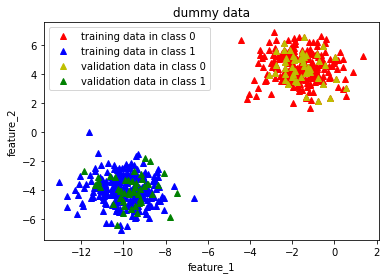

In [17]:

#Creating a dummy dataset that is linearly separable, as shown on the plots
# creating the dataset
from sklearn import datasets
dummy_X, dummy_y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1, random_state=1)
dummy_Xval,dummy_yval=datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1, random_state=1)
dummy_y[dummy_y==0]=-1
dummy_yval[dummy_yval==0]=-1


#Plot of the dataset
plt.plot(dummy_X[:, 0][dummy_y == -1], dummy_X[:, 1][dummy_y == -1], 'r^')
plt.plot(dummy_X[:, 0][dummy_y == 1], dummy_X[:, 1][dummy_y == 1], 'b^')
plt.plot(dummy_Xval[:, 0][dummy_yval == -1], dummy_Xval[:, 1][dummy_yval == -1], 'y^')
plt.plot(dummy_Xval[:, 0][dummy_yval == 1], dummy_Xval[:, 1][dummy_yval == 1], 'g^')
plt.legend(['training data in class 0','training data in class 1','validation data in class 0','validation data in class 1'])
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('dummy data')
plt.show()

In [18]:
#initialize weight for the dummy dataset
dummy_weight=np.random.rand(2).reshape((2,1))
dummy_weight

array([[0.52585012],
       [0.92045325]])

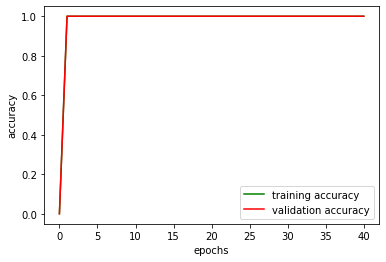

(array([[ -392.78730533],
        [-1078.24322158],
        [ -100.        ]]),
 1.0,
 1.0)

In [19]:
## Run the algorithm on the dummy dataset
train_perceptron(dummy_X,dummy_y,dummy_Xval,dummy_yval,dummy_weight,epochs=40,bias=0,learn_rate=100,batch_size=1)

**The algorithm return the perfect score, indicating that the algorithm should be working correctly**

# Using the perceptron on the diabetes dataset

In [20]:
## Generating random weight for the actual dataset
np.random.seed(1)
weight=np.random.rand(8).reshape((8,1))
weight
bias=np.random.random()
weight,bias

(array([[4.17022005e-01],
        [7.20324493e-01],
        [1.14374817e-04],
        [3.02332573e-01],
        [1.46755891e-01],
        [9.23385948e-02],
        [1.86260211e-01],
        [3.45560727e-01]]),
 0.39676747423066994)

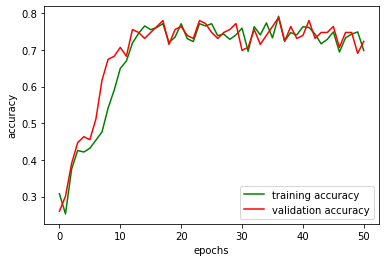

(array([[-0.00174275],
        [-0.002615  ],
        [ 0.00201607],
        [-0.00030399],
        [ 0.00062577],
        [-0.00401161],
        [-0.0026714 ],
        [-0.00070593],
        [ 0.        ]]),
 0.6985743380855397,
 0.7235772357723578)

In [21]:
#testing batch size
# update after each observation
train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=None,learn_rate=0.001,batch_size=1)

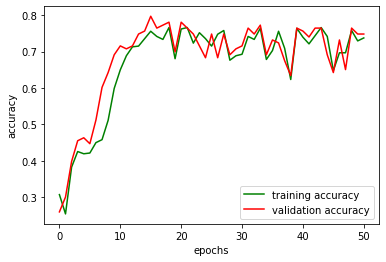

(array([[-0.01303695],
        [-0.02812266],
        [ 0.01475377],
        [-0.00836462],
        [ 0.00131598],
        [-0.02312646],
        [-0.01080732],
        [-0.00547272],
        [ 0.        ]]),
 0.7372708757637475,
 0.7479674796747967)

In [22]:
# update after every 10% of all observation
train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=None,learn_rate=0.001,batch_size=int(len(y_train)/10))

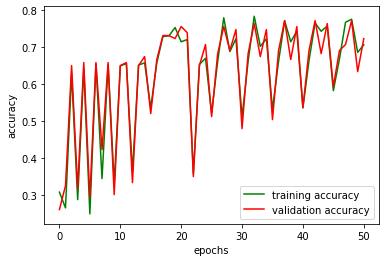

(array([[-0.10991929],
        [-0.21108244],
        [ 0.09077009],
        [-0.05391019],
        [-0.02762492],
        [-0.18843941],
        [-0.1064247 ],
        [-0.05613938],
        [ 0.        ]]),
 0.7067209775967414,
 0.7235772357723578)

In [23]:
#Update after all observation has passed
train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=None,learn_rate=0.001,batch_size=int(len(y_train)))

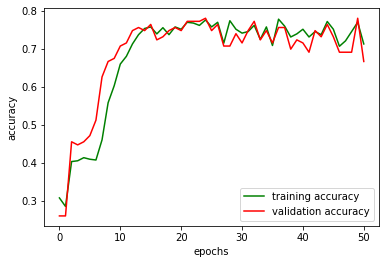

(array([[-0.00080158],
        [-0.00487633],
        [ 0.00273737],
        [ 0.00028183],
        [ 0.00166358],
        [-0.0043216 ],
        [-0.00131695],
        [ 0.00069408],
        [ 0.001     ]]),
 0.7128309572301426,
 0.6666666666666666)

In [24]:
## Testing shuffle effect on the dataset (batch size=1)- no shuffling

train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=0,learn_rate=0.001,batch_size=1,shuffle=False)

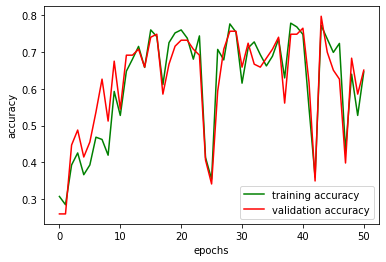

(array([[-2.27221780e-03],
        [-4.06733823e-03],
        [ 1.57341522e-03],
        [ 2.11083232e-04],
        [ 7.74629417e-04],
        [-3.96251333e-03],
        [ 7.00838098e-04],
        [ 2.93974743e-04],
        [-2.08166817e-17]]),
 0.6456211812627292,
 0.6504065040650406)

In [25]:
## Testing shuffle effect on the dataset (batch size=1) - with shuffling

train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=0,learn_rate=0.001,batch_size=1,shuffle=True)

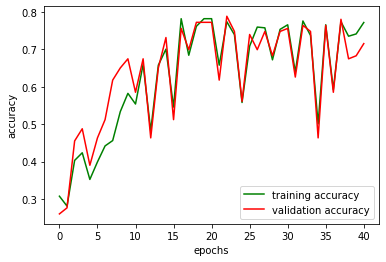

(array([[-0.00909573],
        [-0.04249954],
        [ 0.01178649],
        [-0.00364748],
        [ 0.01094251],
        [-0.0280698 ],
        [-0.00670561],
        [-0.00397268],
        [ 0.004     ]]),
 0.7718940936863544,
 0.7154471544715447)

In [26]:
## Testing shuffle effect on the dataset(batch size=10% of training data) - with shuffling
train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=40,bias=0,learn_rate=0.001,batch_size=int(len(y_train)/10),shuffle=True)

In [27]:
## Tuning model to find optimal parameters (bias, learning rate and early stopping)

bias_list=[None,bias]
learn_rate=[0.1,0.01,0.001,0.0001]
early_stopping=[0,12]
print(f'bias\t learnign rate \t early stopping \t train_acc \t val_acc')
results_acc=[]
for lr in learn_rate:
    for b in bias_list:
        for e in early_stopping:
            res_w,train_acc,val_acc=train_perceptron(X_train,y_train,X_val,y_val,
                                                     weight,epochs=50,bias=b,learn_rate=lr,early_stopping=e
                                                    ,plot=False)
            print(f'{b is not None}\t {lr}\t\t {e} \t\t\t {train_acc}\t {val_acc} ')
            print()

bias	 learnign rate 	 early stopping 	 train_acc 	 val_acc
False	 0.1		 0 			 0.7393075356415478	 0.7723577235772358 

training stop after 23 epochs
False	 0.1		 12 			 0.7576374745417516	 0.8048780487804879 

True	 0.1		 0 			 0.7678207739307535	 0.7073170731707317 

training stop after 18 epochs
True	 0.1		 12 			 0.769857433808554	 0.7804878048780488 

False	 0.01		 0 			 0.725050916496945	 0.7560975609756098 

training stop after 29 epochs
False	 0.01		 12 			 0.7861507128309573	 0.7804878048780488 

True	 0.01		 0 			 0.7311608961303462	 0.7317073170731707 

training stop after 28 epochs
True	 0.01		 12 			 0.7576374745417516	 0.7886178861788617 

False	 0.001		 0 			 0.6985743380855397	 0.7235772357723578 

training stop after 30 epochs
False	 0.001		 12 			 0.7718940936863544	 0.7804878048780488 

True	 0.001		 0 			 0.7107942973523421	 0.6422764227642277 

training stop after 50 epochs
True	 0.001		 12 			 0.769857433808554	 0.7804878048780488 

False	 0.0001		 0 			 0.43584521

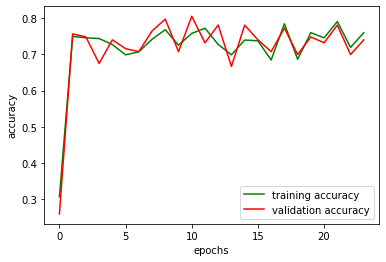

training stop after 23 epochs


(array([[-0.10062505],
        [-0.29273277],
        [ 0.19848169],
        [ 0.01142323],
        [ 0.09285109],
        [-0.4015492 ],
        [-0.17291485],
        [ 0.04889584],
        [ 0.        ]]),
 0.7576374745417516,
 0.8048780487804879)

In [28]:
## plotting learning rate 0.1


train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=None,learn_rate=0.1,early_stopping=12
                                                    ,plot=True)

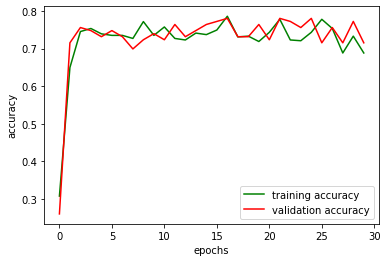

training stop after 29 epochs


(array([[-0.01709561],
        [-0.02429765],
        [ 0.02437743],
        [ 0.00334254],
        [-0.00551423],
        [-0.04020974],
        [-0.02152743],
        [-0.00510574],
        [ 0.        ]]),
 0.7861507128309573,
 0.7804878048780488)

In [29]:
## plotting learning rate 0.01
train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=None,learn_rate=0.01,early_stopping=12
                                                    ,plot=True)

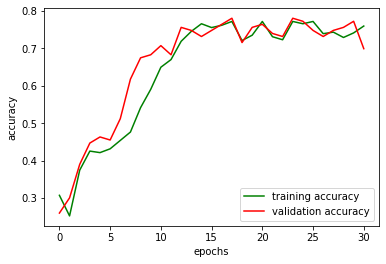

training stop after 30 epochs


(array([[-0.001331  ],
        [-0.00336382],
        [ 0.00195044],
        [ 0.00025156],
        [ 0.00113881],
        [-0.00491028],
        [-0.00179184],
        [ 0.00046071],
        [ 0.        ]]),
 0.7718940936863544,
 0.7804878048780488)

In [30]:
## plotting learning rate 0.001
train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=None,learn_rate=0.001,early_stopping=12
                                                    ,plot=True)

In [31]:
## Using the best model according to validation accuracy on the test data

best_weight=train_perceptron(X_train,y_train,X_val,y_val,weight,epochs=50,bias=None,learn_rate=0.1,early_stopping=12
                                                    ,plot=False)[0]
test_result=[]
for i in range(len(y_test)):
    test_result.append(predict(X_test[i],best_weight)==y_test[i])
print(f'test accuracy is {sum(test_result)/len(y_test)}')

training stop after 23 epochs
test accuracy is 0.7337662337662337


In [33]:
##Test building model only on 2 predictors: glucose and insulin (this is not in the report)

X1=np.array(X_train[:,[1,6]])
X1.shape

(491, 2)

In [34]:
## weight for the new model
dummy_weight=np.random.rand(2).reshape((2,1))
dummy_weight

array([[0.20027141],
       [0.62511159]])

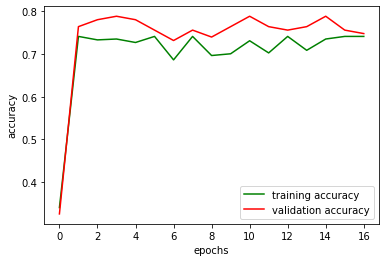

training stop after 16 epochs


(array([[-0.08666134],
        [-0.04781308],
        [ 0.        ]]),
 0.7352342158859471,
 0.7886178861788617)

In [35]:
## training this model

train_perceptron(X_train[:,[1,6]],y_train,X_val[:,[1,6]],y_val,dummy_weight,epochs=50,bias=None,learn_rate=0.1,early_stopping=12
                                                    ,plot=True)